# Le lien vers le dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

# On commance en important les librairies

In [39]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

import numpy as np 
import seaborn as sns



# Lecture du fichier

In [40]:
df = pd.read_csv("heart.csv")

# On verifier s'il ya des valeurs null

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# On scale les colones , on cree le classifieur et on le test

Accuracy :  84.24%


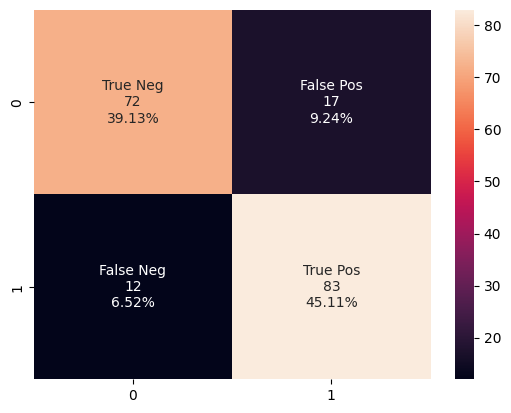

In [37]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
mms = MinMaxScaler() 
ss = StandardScaler() 
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

features = df[df.columns.drop(['HeartDisease'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)
classifier_lr = LogisticRegression(random_state = 24,C=10,penalty= 'l2') 
classifier_lr.fit(x_train,y_train)
prediction = classifier_lr.predict(x_test)
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
cm = confusion_matrix(y_test,classifier_lr.predict(x_test))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,fmt ='');



# On sauvegard notre classifieur

In [28]:
with open('model.pkl','wb') as f:
    pickle.dump(classifier_lr,f)

# On sauvegard notre scaler

In [41]:

df = pd.read_csv("heart.csv")

le_sex = LabelEncoder().fit(df['Sex'])
le_chest_pain = LabelEncoder().fit(df['ChestPainType'])
le_resting_ecg = LabelEncoder().fit(df['RestingECG'])
le_exercise_angina = LabelEncoder().fit(df['ExerciseAngina'])
le_st_slope = LabelEncoder().fit(df['ST_Slope'])

mms_oldpeak = MinMaxScaler().fit(df[['Oldpeak']])
ss_age = StandardScaler().fit(df[['Age']])
ss_resting_bp = StandardScaler().fit(df[['RestingBP']])
ss_cholesterol = StandardScaler().fit(df[['Cholesterol']])
ss_max_hr = StandardScaler().fit(df[['MaxHR']])

with open('encoders_scalers.pkl', 'wb') as file:
    pickle.dump({
        'le_sex': le_sex,
        'le_chest_pain': le_chest_pain,
        'le_resting_ecg': le_resting_ecg,
        'le_exercise_angina': le_exercise_angina,
        'le_st_slope': le_st_slope,
        'mms_oldpeak': mms_oldpeak,
        'ss_age': ss_age,
        'ss_resting_bp': ss_resting_bp,
        'ss_cholesterol': ss_cholesterol,
        'ss_max_hr': ss_max_hr
    }, file)
